# Proceso EDA
---
1. Cargar los datos como un Pandas dataframe

2. LLevar a cabo un proceso EDA (Exploratory Data Analysis) para entender/comprender sus datos. Y esto significa:
  - Cuántas instancias y atributos hay
  - Qué tipo de atributos hay (numéricos o categóricos). Esto se hace para comprobar si hay características categóricas que deban ser codificadas (como dummies / one-hot-encoding)
  - Qué atributos tienen valores faltantes, y cuántos
  - Si se trata de un problema de clasificación o de regresión (variable de salida es una clase o un valor continuo), y en caso de clasificación, si la clase está desequilibrada.

3. Codificar el Pandas dataframe como una matriz numpy (transformar los valores categóricos y los valores faltantes)

4. Diseñar modelos de aprendizaje automático con scikit-learn

In [116]:
# Cargamos el archivo
import pandas as pd
data_df = pd.read_csv("attrition_25/attrition_availabledata_06.csv") 

Podemos comprobar el valos de las primeras instancias del dataframe

In [117]:
data_df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No


El dataset es demasiado grande, por eso no podemos visualizarlo al completo

In [118]:
data_df

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.550183,18,3,3,2.0,2.0,3.0,32,Non-Travel,Research & Development,...,Y,11,8,1,12.0,2,7,0,7,No
2936,6.976802,21,3,4,3.0,4.0,2.0,51,Travel_Rarely,Research & Development,...,Y,22,8,1,18.0,2,7,0,7,No
2937,10.092581,12,3,3,3.0,4.0,3.0,28,Travel_Frequently,Sales,...,Y,11,8,0,7.0,3,7,0,7,No
2938,8.333744,18,2,3,2.0,4.0,3.0,24,Travel_Rarely,Sales,...,Y,15,8,2,6.0,2,6,1,4,No


Ahora observamos cuantos y qué tipo de datos vamos a estar tratando


In [119]:
print('The shape of the data table is:')
print('===============================')
print(data_df.shape)
print()

print('The types of the attributes are:')
print('================================')
data_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(data_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(data_df.isnull().mean())


The shape of the data table is:
(2940, 31)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  E

Gracias a este análisis sabemos que tendremos:

+ 2940 muestras (trabajadores)
+ 31 datos de cada una de ellas
    - Datos existentes de 3 tipos (object, int y float64)
    - Algunos datos faltan de ciertos trabajadores, pero comparándolo con el total no faltan demasiados
    - existen 8 variables de tipo object o categóricas que tendremos que convertir
+ Nuestra variable objetivo (attrition) es de tipo categórica, por lo que estamos ante un problema de clasificación


Eliminaremos aquellas filas con variables nulos para evitar errores futuros

In [120]:
data_df = data_df.dropna()

Antes de convertir las variables categóricas, debemos analizar cuales poseen una alta cardinalidad

In [121]:
# Paso 1: Identificar variables categóricas
categorical_columns = data_df.select_dtypes(include=['object']).columns

# Paso 2: Contar las categorías únicas por variable
cardinality = data_df[categorical_columns].nunique()

print("Cardinalidad de las variables categóricas:")
print(cardinality)

Cardinalidad de las variables categóricas:
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
Attrition         2
dtype: int64


Éstos datos nos indican que no tenemos ninguna variable con demasiada cardinalidad.

variable con más cardinalidad: "JobRole" con 9

Podremos convertir nuestras variables categóricas a datos enteros.

In [122]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
le = LabelEncoder()

#Identificamos las variables categóricas
categorical_columns = data_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    data_df[column] = le.fit_transform(data_df[column])  # Aplicar el LabelEncoder
    print(f"Mapping of categories to numbers for '{column}':")
    for i, category in enumerate(le.classes_):
        print(f"{category}: {i}")
    print() 

Mapping of categories to numbers for 'BusinessTravel':
Non-Travel: 0
Travel_Frequently: 1
Travel_Rarely: 2

Mapping of categories to numbers for 'Department':
Human Resources: 0
Research & Development: 1
Sales: 2

Mapping of categories to numbers for 'EducationField':
Human Resources: 0
Life Sciences: 1
Marketing: 2
Medical: 3
Other: 4
Technical Degree: 5

Mapping of categories to numbers for 'Gender':
Female: 0
Male: 1

Mapping of categories to numbers for 'JobRole':
Healthcare Representative: 0
Human Resources: 1
Laboratory Technician: 2
Manager: 3
Manufacturing Director: 4
Research Director: 5
Research Scientist: 6
Sales Executive: 7
Sales Representative: 8

Mapping of categories to numbers for 'MaritalStatus':
Divorced: 0
Married: 1
Single: 2

Mapping of categories to numbers for 'Over18':
Y: 0

Mapping of categories to numbers for 'Attrition':
No: 0
Yes: 1



/tmp/ipykernel_10668/1808320733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[column] = le.fit_transform(data_df[column])  # Aplicar el LabelEncoder
/tmp/ipykernel_10668/1808320733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[column] = le.fit_transform(data_df[column])  # Aplicar el LabelEncoder
/tmp/ipykernel_10668/1808320733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Ahora debemos comprobar que variables son menos importantes, es decir cuales tienen menos efecto sobre nuestra variable Attrition.


Debemos normalizar los datos antes ya que no todos se encuentran en la misma escala

/tmp/ipykernel_10668/717765699.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index[1:11], y=correlation.values[1:11], palette="coolwarm")


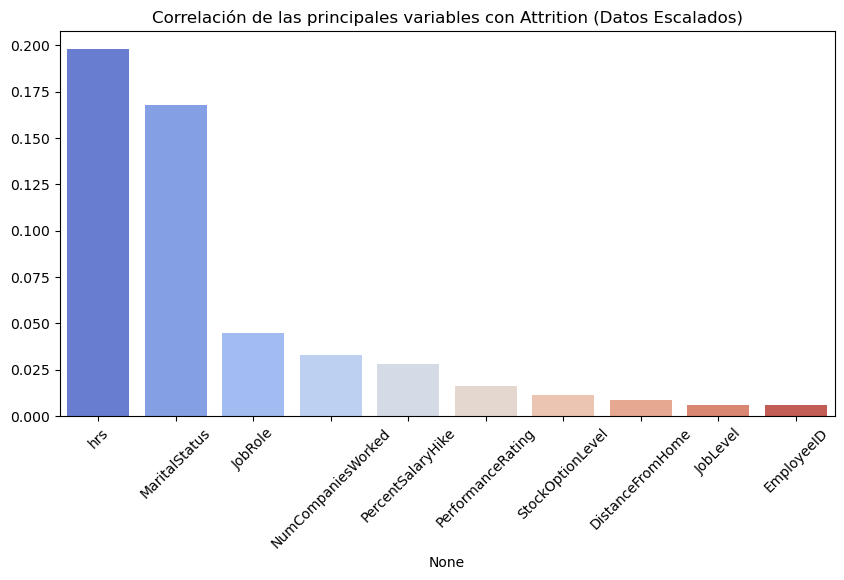

In [123]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del dataframe para no modificar el original
scaled_df = data_df.copy()

# Normalizar solo las variables numéricas (excepto la variable objetivo 'Attrition')
scaler = StandardScaler()
numerical_columns = scaled_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('Attrition')  # Excluir la variable objetivo

scaled_df[numerical_columns] = scaler.fit_transform(scaled_df[numerical_columns])

# Calcular la correlación nuevamente con las variables escaladas
correlation = scaled_df.corr()['Attrition'].sort_values(ascending=False)

# Visualizar la correlación en un gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=correlation.index[1:11], y=correlation.values[1:11], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlación de las principales variables con Attrition (Datos Escalados)")
plt.show()


Esto indica que las horas de trabajo están fuertemente relacionadas al igual que si nuestro trabajador está casado o no.

Aun no hemos comprobado que variables son innecesarias y, por tanto, se pueden eliminar, como aquellas constantes

In [124]:
# Identificar columnas constantes
constant_columns = [col for col in data_df.columns if data_df[col].nunique() == 1]

# Eliminar las columnas constantes del dataframe
data_df = data_df.drop(columns=constant_columns)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas (constantes): {constant_columns}")

Columnas eliminadas (constantes): ['EmployeeCount', 'Over18', 'StandardHours']


Puesto que nos encontramos ante un problema de clasificación debemos analizar si nuestra variable Attrition está equilibrada:

In [125]:

# Comprobar cuántas veces aparece cada clase en la columna 'Attrition'
print(data_df['Attrition'].value_counts())

# Comprobar la proporción de cada clase
print(data_df['Attrition'].value_counts(normalize=True))

Attrition
0    2401
1     463
Name: count, dtype: int64
Attrition
0    0.838338
1    0.161662
Name: proportion, dtype: float64


Observamos que está muy desequilibrada, por lo que debemos usar *Stratified k-fold cross-validation*

In [126]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import numpy as np

X = data_df.drop(columns=['Attrition'])  # Elimina la columna 'Attrition'
y = data_df['Attrition']  # Definir la variable objetivo

# Crear el validador Stratified K-Fold con 5 pliegues
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar el clasificador (árbol de decisión en este caso)
clf = DecisionTreeClassifier()
# Hacer que el entrenamiento sea reproducible
np.random.seed(42)

# Ejecutar validación cruzada con precisión como métrica
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)

# Mostrar los resultados
print(f"Todas las precisiones son: {scores}")
print(f"Y la precisión promedio de la validación cruzada es: {scores.mean():.2f} ± {scores.std():.2f}")


Todas las precisiones son: [0.90401396 0.88830716 0.90052356 0.93368237 0.92132867]
Y la precisión promedio de la validación cruzada es: 0.91 ± 0.02


Éste es el arbol de decisión utilizado para el calculo:

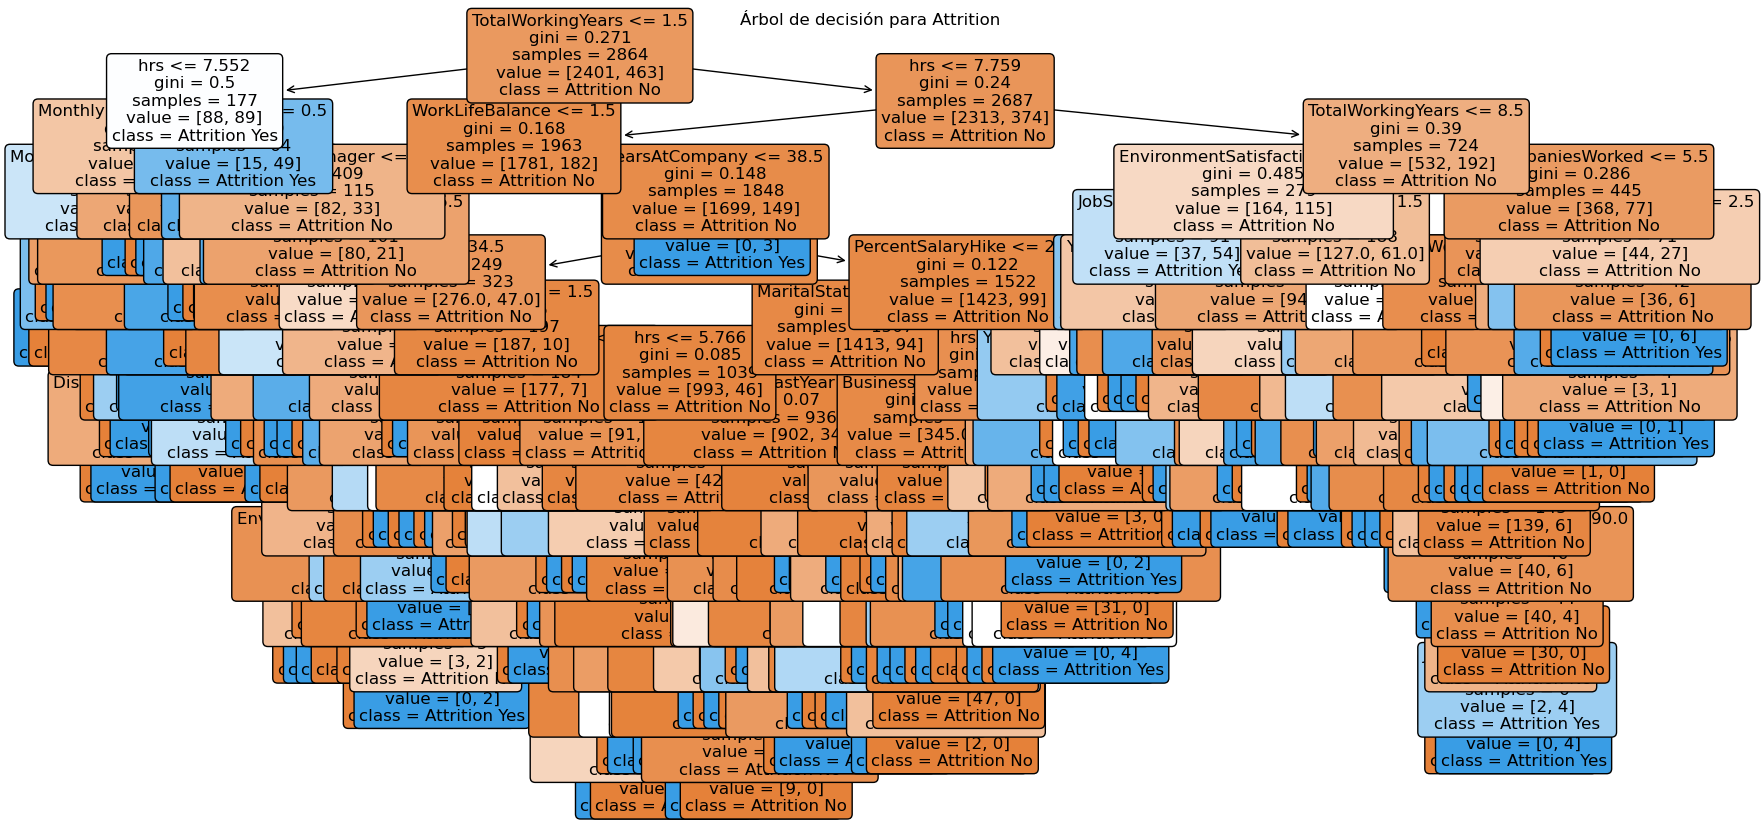

In [127]:
# Antes de graficar, tenemos que entrenarlo
clf.fit(X, y)


# Graficamos el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Attrition No', 'Attrition Yes'], rounded=True, fontsize=12)
plt.title("Árbol de decisión para Attrition")
plt.show()